In [1]:
# begin exploration here!
import numpy as np
import pandas as pd
import scipy.stats as stats

# graphing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

# model selection
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve)

# models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from datetime import date

# enable reload of changed files
%load_ext autoreload
%autoreload 2

# plot inline
%matplotlib inline

# Loading Data

In [2]:
data = pd.read_csv('data/train.csv')

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\2801730928.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [4]:
X = data[['SalePrice','MachineID','ModelID','datasource','auctioneerID','SalesID','MachineID','YearMade','MachineHoursCurrentMeter','UsageBand','saledate','fiProductClassDesc','state','ProductGroup','Enclosure']]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalePrice                 401125 non-null  int64  
 1   MachineID                 401125 non-null  int64  
 2   ModelID                   401125 non-null  int64  
 3   datasource                401125 non-null  int64  
 4   auctioneerID              380989 non-null  float64
 5   SalesID                   401125 non-null  int64  
 6   MachineID                 401125 non-null  int64  
 7   YearMade                  401125 non-null  int64  
 8   MachineHoursCurrentMeter  142765 non-null  float64
 9   UsageBand                 69639 non-null   object 
 10  saledate                  401125 non-null  object 
 11  fiProductClassDesc        401125 non-null  object 
 12  state                     401125 non-null  object 
 13  ProductGroup              401125 non-null  o

In [6]:
X.isna().sum()
'''
se debe limpiar 
MachineHoursCurrentMeter         
UsageBand                   
Enclosure                      
'''

'\nse debe limpiar \nMachineHoursCurrentMeter         \nUsageBand                   \nEnclosure                      \n'

'\nEl año 1000 no hace sentido\n'

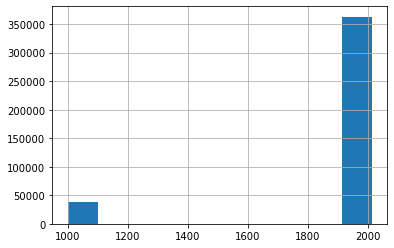

In [7]:
X.YearMade.hist()
'''
El año 1000 no hace sentido
'''

<AxesSubplot:>

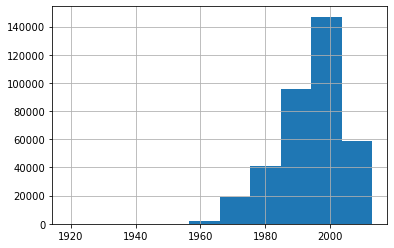

In [8]:
X['YearMade'][X.YearMade > 1000].hist()


In [9]:
X.YearMade.value_counts()
'''
el año 1000, aun es mayoria, esto es extraño, 
¿se podrá reemplazar con un promedio?
o se deberá reemplazar con la mediana??
probablemente sirva el promedio pero por tipo de maquina...
Tambien está extraño que haya maquinas fabricadas en 1937,1942, 1949 y 1947
dado que la informacion antes de 1960 parece no representativa, 
se podría eliminar
'''

'\nel año 1000, aun es mayoria, esto es extraño, \n¿se podrá reemplazar con un promedio?\no se deberá reemplazar con la mediana??\nprobablemente sirva el promedio pero por tipo de maquina...\nTambien está extraño que haya maquinas fabricadas en 1937,1942, 1949 y 1947\ndado que la informacion antes de 1960 parece no representativa, \nse podría eliminar\n'

In [10]:
mean_by_PG = X[['ProductGroup','YearMade']][X.YearMade>1000].groupby('ProductGroup').mean().round().astype(int)
print(mean_by_PG)
mean_by_PG = X[['ProductGroup','YearMade']][X.YearMade>1960].groupby('ProductGroup').mean().round().astype(int)
print(mean_by_PG)

              YearMade
ProductGroup          
BL                1995
MG                1985
SSL               2000
TEX               1997
TTT               1991
WL                1991
              YearMade
ProductGroup          
BL                1995
MG                1985
SSL               2000
TEX               1997
TTT               1991
WL                1991


In [11]:
median_by_PG = X[['ProductGroup','YearMade']][X.YearMade>1000].groupby('ProductGroup').median()
print(median_by_PG)
median_by_PG = X[['ProductGroup','YearMade']][X.YearMade>1950].groupby('ProductGroup').median()
print(median_by_PG)
'''No hay un cambio significativo, por lo que se asigna la mediana que estadisticamente es un dato mas representativo y puede significar un menor BIAS'''

              YearMade
ProductGroup          
BL              1997.0
MG              1985.0
SSL             2000.0
TEX             1997.0
TTT             1993.0
WL              1993.0
              YearMade
ProductGroup          
BL              1997.0
MG              1985.0
SSL             2000.0
TEX             1997.0
TTT             1993.0
WL              1993.0


'No hay un cambio significativo, por lo que se asigna la mediana que estadisticamente es un dato mas representativo y puede significar un menor BIAS'

In [12]:
X.YearMade.describe()

count    401125.000000
mean       1899.156901
std         291.797469
min        1000.000000
25%        1985.000000
50%        1995.000000
75%        2000.000000
max        2013.000000
Name: YearMade, dtype: float64

In [13]:
'''Reemplazo los valores de YearMade == 1000
con la media por cada grupo de producto'''
print(median_by_PG)
for pg,ym in median_by_PG.iterrows():
    X['YearMade'][(X.YearMade==1000) & (X.ProductGroup == pg)] = ym

              YearMade
ProductGroup          
BL              1997.0
MG              1985.0
SSL             2000.0
TEX             1997.0
TTT             1993.0
WL              1993.0


C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\1502505588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearMade'][(X.YearMade==1000) & (X.ProductGroup == pg)] = ym


In [14]:
median_by_PG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, BL to WL
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YearMade  6 non-null      float64
dtypes: float64(1)
memory usage: 96.0+ bytes


<AxesSubplot:>

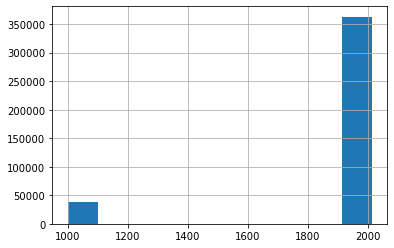

In [15]:
X.YearMade.hist()

In [16]:
X[X.YearMade==1000]

,SalePrice,MachineID,ModelID,datasource,auctioneerID,SalesID,MachineID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiProductClassDesc,state,ProductGroup,Enclosure
9,65000,1016474,3883,121,3.0,1139275,1016474,1000,20700.0,Medium,08/09/2007 00:00,Wheel Loader - 350.0 to 500.0 Horsepower,Florida,WL,EROPS w AC
21,34500,999192,3350,121,3.0,1139333,999192,1000,16328.0,Medium,10/19/2006 0:00,Motorgrader - 45.0 to 130.0 Horsepower,Nevada,MG,EROPS
33,14000,1050658,1918,121,3.0,1139369,1050658,1000,0.0,NaN,1/28/2010 0:00,"Track Type Tractor, Dozer - 130.0 to 160.0 Hor...",Michigan,TTT,OROPS
35,10000,1068548,112,121,3.0,1139382,1068548,1000,3981.0,Low,06/09/2011 00:00,Wheel Loader - 275.0 to 350.0 Horsepower,Arkansas,WL,EROPS w AC
36,8250,1011114,7110,121,3.0,1139390,1011114,1000,0.0,NaN,5/19/2011 0:00,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Mississippi,BL,OROPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401066,14000,1797445,20995,149,1.0,6332598,1797445,1000,NaN,NaN,6/23/2011 0:00,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Ohio,TEX,EROPS
401069,37500,1864798,20998,149,2.0,6332803,1864798,1000,NaN,NaN,9/16/2011 0:00,"Hydraulic Excavator, Track - 14.0 to 16.0 Metr...",Maryland,TEX,EROPS
401072,11000,1929774,21436,149,1.0,6333184,1929774,1000,NaN,NaN,11/02/2011 00:00,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,EROPS
401073,10000,1926563,21435,149,1.0,6333196,1926563,1000,NaN,NaN,12/14/2011 0:00,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Illinois,TEX,EROPS


In [17]:
X['YearMade'] = X.YearMade.fillna(X.YearMade.mean())

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\3664248004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearMade'] = X.YearMade.fillna(X.YearMade.mean())


In [18]:
X[X['MachineHoursCurrentMeter'].isna()]
'''
estoy buscando las ventas que no tienen horas
reemplazaré las NaN con la media por tipo de maquina...
las horas 0, tambien las reemplazaré con el promedio, 
ya que son horas no reportadas, pero no se especifica que sean maquinas nuevas
'''

'\nestoy buscando las ventas que no tienen horas\nreemplazaré las NaN con la media por tipo de maquina...\nlas horas 0, tambien las reemplazaré con el promedio, \nya que son horas no reportadas, pero no se especifica que sean maquinas nuevas\n'

In [19]:
X['MachineHoursCurrentMeter'] = X.MachineHoursCurrentMeter.fillna(0)

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\588695639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MachineHoursCurrentMeter'] = X.MachineHoursCurrentMeter.fillna(0)


<AxesSubplot:>

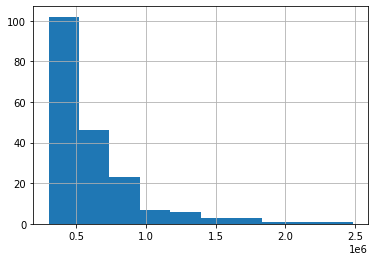

In [20]:
X['MachineHoursCurrentMeter'][X['MachineHoursCurrentMeter'] > 300000].hist()

In [21]:
X.MachineHoursCurrentMeter.describe().T

count    4.011250e+05
mean     1.230726e+03
std      1.654290e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

In [22]:
'''
Agrego la columna de MHCM_years para comparar vs las horas de vida del equipo
para descartar outliers
'''
X['MHCM_years'] = X.MachineHoursCurrentMeter.fillna(0) / (24*365)

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\2366538935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['MHCM_years'] = X.MachineHoursCurrentMeter.fillna(0) / (24*365)


In [23]:
'''
Elimino los renglones donde las horas de trabajo sean mayores a las horas de vida del equipo, 
ya que el dato no hace sentido
'''
X = X[((pd.DatetimeIndex(X['saledate']).year - X.YearMade) < X.MHCM_years)==False]

In [24]:
#Corregir la hora
X['saledate'] = pd.to_datetime(X['saledate'].astype(str), format='%m/%d/%Y %H:%M', errors='coerce')

C:\Users\jeramirez\AppData\Local\Temp\ipykernel_15368\1425925898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['saledate'] = pd.to_datetime(X['saledate'].astype(str), format='%m/%d/%Y %H:%M', errors='coerce')


In [25]:
X = X.drop(columns='MachineHoursCurrentMeter',axis = 1)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400671 entries, 0 to 401124
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   SalePrice           400671 non-null  int64         
 1   MachineID           400671 non-null  int64         
 2   ModelID             400671 non-null  int64         
 3   datasource          400671 non-null  int64         
 4   auctioneerID        380716 non-null  float64       
 5   SalesID             400671 non-null  int64         
 6   MachineID           400671 non-null  int64         
 7   YearMade            400671 non-null  int64         
 8   UsageBand           69197 non-null   object        
 9   saledate            400671 non-null  datetime64[ns]
 10  fiProductClassDesc  400671 non-null  object        
 11  state               400671 non-null  object        
 12  ProductGroup        400671 non-null  object        
 13  Enclosure           400346 no

In [27]:
usage = {'Low':3,'High':1,'Medium':2}
X.UsageBand = X['UsageBand'].map(usage).fillna(0)

'''
Ahora es momento de trabajar con las columnas de tipo texto
'''
fiProductClassDesc
state
ProductGroup
Enclosure 

In [28]:
'''
Considero que se debe descartar, porque existe la posibilidad de que en los datos de prueba 
y en ejecucion no se cumpla alguna de las columnas...
'''
X = X.drop(columns='fiProductClassDesc',axis = 1)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400671 entries, 0 to 401124
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SalePrice     400671 non-null  int64         
 1   MachineID     400671 non-null  int64         
 2   ModelID       400671 non-null  int64         
 3   datasource    400671 non-null  int64         
 4   auctioneerID  380716 non-null  float64       
 5   SalesID       400671 non-null  int64         
 6   MachineID     400671 non-null  int64         
 7   YearMade      400671 non-null  int64         
 8   UsageBand     400671 non-null  float64       
 9   saledate      400671 non-null  datetime64[ns]
 10  state         400671 non-null  object        
 11  ProductGroup  400671 non-null  object        
 12  Enclosure     400346 non-null  object        
 13  MHCM_years    400671 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 

In [30]:
X[['Is_Alaska','Is_Arizona','Is_Arkansas','Is_California','Is_Colorado','Is_Connecticut','Is_Delaware',
'Is_Florida','Is_Georgia','Is_Hawaii','Is_Idaho','Is_Illinois','Is_Indiana','Is_Iowa','Is_Kansas','Is_Kentucky',
'Is_Louisiana','Is_Maine','Is_Maryland','Is_Massachusetts','Is_Michigan','Is_Minnesota','Is_Mississippi','Is_Missouri',
'Is_Montana','Is_Nebraska','Is_Nevada','Is_New Hampshire','Is_New Jersey','Is_New Mexico','Is_New York','Is_North Carolina',
'Is_North Dakota','Is_Ohio','Is_Oklahoma','Is_Oregon','Is_Pennsylvania','Is_Puerto Rico','Is_Rhode Island','Is_South Carolina',
'Is_South Dakota','Is_Tennessee','Is_Texas','Is_Unspecified','Is_Utah','Is_Vermont','Is_Virginia','Is_Washington',
'Is_Washington DC','Is_West Virginia','Is_Wisconsin','Is_Wyoming']] = pd.get_dummies(X.state, drop_first = True, prefix='Is')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400671 entries, 0 to 401124
Data columns (total 66 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SalePrice          400671 non-null  int64         
 1   MachineID          400671 non-null  int64         
 2   ModelID            400671 non-null  int64         
 3   datasource         400671 non-null  int64         
 4   auctioneerID       380716 non-null  float64       
 5   SalesID            400671 non-null  int64         
 6   MachineID          400671 non-null  int64         
 7   YearMade           400671 non-null  int64         
 8   UsageBand          400671 non-null  float64       
 9   saledate           400671 non-null  datetime64[ns]
 10  state              400671 non-null  object        
 11  ProductGroup       400671 non-null  object        
 12  Enclosure          400346 non-null  object        
 13  MHCM_years         400671 non-null  float64 

In [31]:
X[['Is_BL', 'Is_MG','Is_SSL', 'Is_TEX', 'Is_TTT', 'Is_WL' ]]  = pd.get_dummies(X.ProductGroup, drop_first = True, prefix='Is')
X.info()

ValueError: Columns must be same length as key

In [ ]:
X[['Is_EROPS w AC', 'Is_EROPS','Is_nan','Is_NO ROPS','Is_None or Unspecified''Is_OROPS' ]]  = pd.get_dummies(X.Enclosure, drop_first = True, prefix='Is')

In [ ]:
X = X.drop(columns=['state','ProductGroup','Enclosure'],axis = 1)

In [ ]:
X['saledate']=X['saledate'].map(date.toordinal)

In [ ]:
X.info()

In [ ]:
X.describe().T

In [ ]:
X.auctioneerID = X.auctioneerID.fillna(0)

In [ ]:
y_train = X['SalePrice']
X_train = X.iloc[:,1:]

In [ ]:
y_train,X_train

In [ ]:
data_test = pd.read_csv('data/test.csv')

In [ ]:
X_tst = data_test[['MachineID','ModelID','datasource','auctioneerID','SalesID','MachineID','YearMade','MachineHoursCurrentMeter','UsageBand','saledate','fiProductClassDesc','state','ProductGroup','Enclosure']]

In [ ]:
median_by_PG_tst = X_tst[['ProductGroup','YearMade']][X_tst.YearMade>1960].groupby('ProductGroup').mean().round().astype(int)
for pg,ym in median_by_PG_tst.iterrows():
    X_tst['YearMade'][(X_tst.YearMade==1000) & (X_tst.ProductGroup == pg)] = ym

In [ ]:
X_tst['YearMade'] = X_tst.YearMade.fillna(X_tst.YearMade.mean())

In [ ]:
X_tst['MachineHoursCurrentMeter'] = X_tst.MachineHoursCurrentMeter.fillna(0)

In [ ]:
X_tst['saledate'] = pd.to_datetime(X_tst['saledate'].astype(str), format='%m/%d/%Y %H:%M', errors='coerce')

In [ ]:
X_tst = X_tst.drop(columns='MachineHoursCurrentMeter',axis = 1)

In [ ]:
usage = {'Low':3,'High':1,'Medium':2}
X_tst.UsageBand = X_tst['UsageBand'].map(usage).fillna(0)

In [ ]:
X_tst = X_tst.drop(columns='fiProductClassDesc',axis = 1)

In [ ]:
pd.get_dummies(X_tst.state, drop_first = True, prefix='Is'),pd.get_dummies(data.state, drop_first = True, prefix='Is')

In [ ]:
X_tst[['Is_Alaska','Is_Arizona','Is_Arkansas','Is_California','Is_Colorado','Is_Connecticut','Is_Delaware',
'Is_Florida','Is_Georgia','Is_Hawaii','Is_Idaho','Is_Illinois','Is_Indiana','Is_Iowa','Is_Kansas','Is_Kentucky',
'Is_Louisiana','Is_Maine','Is_Maryland','Is_Massachusetts','Is_Michigan','Is_Minnesota','Is_Mississippi','Is_Missouri',
'Is_Montana','Is_Nebraska','Is_Nevada','Is_New Hampshire','Is_New Jersey','Is_New Mexico','Is_New York','Is_North Carolina',
'Is_North Dakota','Is_Ohio','Is_Oklahoma','Is_Oregon','Is_Pennsylvania','Is_Puerto Rico','Is_Rhode Island','Is_South Carolina',
'Is_South Dakota','Is_Tennessee','Is_Texas','Is_Unspecified','Is_Utah','Is_Vermont','Is_Virginia','Is_Washington',
'Is_Washington DC','Is_West Virginia','Is_Wisconsin','Is_Wyoming']] = pd.get_dummies(X_tst.state, drop_first = True, prefix='Is')

In [ ]:
X_tst[['Is_BL', 'Is_MG','Is_SSL', 'Is_TEX', 'Is_TTT', 'Is_WL' ]]  = pd.get_dummies(X_tst.ProductGroup, drop_first = True, prefix='Is')

In [ ]:
X_tst[['Is_EROPS w AC', 'Is_EROPS','Is_nan','Is_NO ROPS','Is_None or Unspecified''Is_OROPS' ]]  = pd.get_dummies(X_tst.Enclosure, drop_first = True, prefix='Is')

In [ ]:
X_tst = X_tst.drop(columns=['state','ProductGroup','Enclosure'],axis = 1)

In [ ]:
X_tst['saledate']=X_tst['saledate'].map(date.toordinal)

In [ ]:
X_tst.auctioneerID = X_tst.auctioneerID.fillna(0)